### K-Nearest Neighbours

1.  The main aim of this project is to develop a simple end to end machine learning project and predict the type of the species for the iris plant using K-Nearest Neighbours.

2. We have also uswed here hyperparameter tuning for improving the performance and the accuracy of the model.

### Steps performed by this algorithm:

1.   Import all the necessary libraries

2.   Load the dataset

3.    Explore EDA

4.    Divide the dataset into independent and dependent variables

5.    Divide the independent and dependent variables into training and testing data

6.    Perform the Feature Scaling on the input data

7.    Train the KNN model

8.    Predict the model on the test data

9.    Evaluate the model performance

10.   Perform the Hyper Parameter Tuning of the model

11.   Visualize the performances

12.   Predict the Iris Species

### Step 1:  Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report


### Step 2:   Load the dataset

In [ ]:
data = load_iris()

print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
### Construct the dataframe from the above data

df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
### Adding the target column to th dataframe

df['target'] = data.target

In [1514]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### OBSERVATIONS:

1.  There are total 150 records in the dataset.

2.  There are total 5 columns used in the dataset. Out of which 4 columns are input and only one is the output.

    (a.)   Input ------------------> sepal_length, sepal_width, petal_length, petal_width

    (b.)   Output ----------------->  target



### Step 3:  Explore EDA

In [1515]:
### display the entire dataset

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [1516]:
### display the top five rows of the dataset

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [1517]:
### display the bottom five rows of the dataset

print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2  


In [1518]:
### Rename the columns of the dataset

df.rename(columns={'sepal length (cm)':'sepal_length'     ,
           'sepal width (cm)' :'sepal_width'              ,
           'petal length (cm)':'petal_length'             ,
           'petal width (cm)' :'petal_width'
           }, inplace=True)

In [1519]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1520]:
### Get all the columns used in the dataset

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [1521]:
### get all the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [1522]:
### get the descriptive summary statistics about the dataset

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [1523]:
### Check whether there are any NULL Values in the dataset

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [1524]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


### OBSERVATIONS:

1. There is only one duplicate record in the dataset. So remove the record.

In [1525]:
df.drop_duplicates(inplace=True)

In [1526]:
### Again Check for any duplicate records in the dataset

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target


### OBSERVATIONS:

1. There are no duplicate records in the dataset.

### Step 4:  Divide the dataset into independent and dependent variables

In [1527]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1528]:
X = df.drop(columns='target', axis=1)

Y = df['target']

In [1529]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [1530]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 149, dtype: int64

### Step 5:   Divide the independent and dependent variables into training and testing data

In [1531]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [1532]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
140,6.7,3.1,5.6,2.4
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:", X_test.shape)

Shape of the input training data is: (119, 4)
Shape of the input testing data is: (30, 4)


In [ ]:
Y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 119, dtype: int64

In [ ]:
Y_test

73     1
18     0
117    2
78     1
76     1
31     0
64     1
140    2
68     1
82     1
109    2
12     0
36     0
9      0
19     0
56     1
136    2
69     1
55     1
131    2
29     0
123    2
26     0
127    2
128    2
145    2
110    2
101    2
45     0
30     0
Name: target, dtype: int64

In [ ]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:", Y_test.shape)

Shape of the output training data is: (119,)
Shape of the output testing data is: (30,)


### Step 6:  Perform the Feature Scaling on the input data

In [ ]:
from sklearn.preprocessing import StandardScaler

### create an object for standard scaler

sc = StandardScaler()

### using the object for Standard Scaler, transform the inputs

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.47286067,  1.25077879, -1.55015743, -1.30727768],
       [-0.14230538,  3.0604162 , -1.26565907, -1.03952201],
       [ 1.06729034,  0.11975542,  0.38443139,  0.29925634],
       [-1.23094153,  0.79836944, -1.2087594 , -1.30727768],
       [-1.71477982,  0.34596009, -1.37945841, -1.30727768],
       [ 2.15592649, -0.10644926,  1.63622416,  1.23640118],
       [ 0.70441163,  0.34596009,  0.44133106,  0.43313417],
       [-0.74710324,  1.02457412, -1.26565907, -1.30727768],
       [-0.98902238,  1.25077879, -1.32255874, -1.30727768],
       [-0.74710324,  2.38180217, -1.26565907, -1.44115551],
       [ 1.30920949,  0.34596009,  1.12412712,  1.50415685],
       [ 0.22057334,  0.79836944,  0.44133106,  0.567012  ],
       [ 1.06729034,  0.11975542,  0.55513041,  0.43313417],
       [-0.5051841 ,  1.92939282, -1.37945841, -1.03952201],
       [-0.5051841 ,  1.47698347, -1.26565907, -1.30727768],
       [-0.38422452, -1.46367731, -0.01386631, -0.236255  ],
       [ 0.70441163, -0.

In [ ]:
X_test_scaled

array([[ 0.34153291, -0.55885861,  0.55513041,  0.03150067],
       [-0.14230538,  1.70318815, -1.15185973, -1.17339984],
       [ 2.27688606,  1.70318815,  1.69312383,  1.37027901],
       [ 0.22057334, -0.33265393,  0.44133106,  0.43313417],
       [ 1.18824991, -0.55885861,  0.61203008,  0.29925634],
       [-0.5051841 ,  0.79836944, -1.26565907, -1.03952201],
       [-0.26326495, -0.33265393, -0.07076598,  0.1653785 ],
       [ 1.06729034,  0.11975542,  1.06722745,  1.63803468],
       [ 0.46249248, -1.91608666,  0.44133106,  0.43313417],
       [-0.02134581, -0.78506329,  0.09993304,  0.03150067],
       [ 1.6720882 ,  1.25077879,  1.3517258 ,  1.77191252],
       [-1.23094153, -0.10644926, -1.32255874, -1.44115551],
       [-0.38422452,  1.02457412, -1.37945841, -1.30727768],
       [-1.10998196,  0.11975542, -1.26565907, -1.44115551],
       [-0.86806281,  1.70318815, -1.26565907, -1.17339984],
       [ 0.58345205,  0.57216477,  0.55513041,  0.567012  ],
       [ 0.58345205,  0.

### OBSERVATIONS:

1.  All the input training and the testing data has been scaled in one range.

### Step 7:  Train the KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Call the function for KNN

knn = KNeighborsClassifier(n_neighbors=3)

### using the object for knn, train the model

knn.fit(X_train_scaled,Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### OBSERVATIONS:

1. The  dataset has been trained with the help of knn model.

### Step 8: Predict the model on the test data

In [ ]:
Y_pred = knn.predict(X_test_scaled)

print(Y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Step 9:  Evaluate the model performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy of the model is:", accuracy_score(Y_test, Y_pred)*100.0)


print("Confusion matrix of the model is:", confusion_matrix(Y_test, Y_pred))


print("Classification report of the model is:", classification_report(Y_test, Y_pred))

Accuracy of the model is: 100.0
Confusion matrix of the model is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report of the model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 10: Perform the Hyper Parameter Tuning of the model


We are performing the hyper-paremeter tuning of the model for the following reasons:-

(a.)  To improve the accuracy of the model.

(b.)  To remove the condition of over-fitting and under-fitting.

(c.)  To get the best parameters for the model.


In [ ]:
## As the accuracy of the model is 100% which is impossible, so do hyper parameter tuning of the model

### define the set of parameters

params_grid = {'n_neighbors' : list(range(1,21))}

print(params_grid)


### Create the object for GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(), param_grid=params_grid, cv = 5, scoring= 'accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [ ]:
grid

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


### OBESRVATIONS:

1. The knn model has been gypertuned with the help of grid search cv

## OBSERVATIONS:

2.  Here we have created an object for GridSearchCV where we have tuned the parameters of the model for better accuarcy

3.  Inputs taken are :

        (a)  object for KNN -> KNearestNeighbors that is used for remodifying the KNN Model.

        (b) params_grid --> considered the set of all 20 nearest neighbors

        (c) cv -----> Performed the cross validation of the data where the data is divided into 4 folds for training and one fold for testing.

        (d) scoring ----> Here the accuracy_score is used as a metric to compare the models.

In [ ]:
### using the object for GridSearchCV , train the model

grid.fit(X_train_scaled, Y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [ ]:
## get the best parameters and the score from the GridSearchCV

print("Best parameter of the model is:", grid.best_params_)

print("Bets score of the model is:", grid.best_score_)

Best parameter of the model is: {'n_neighbors': 3}
Bets score of the model is: 0.9579710144927537


In [ ]:
## get the best trained model

print("Bets estimator of the model is:", grid.best_estimator_)

Bets estimator of the model is: KNeighborsClassifier(n_neighbors=3)


In [ ]:
best_knn_model = grid.best_estimator_

In [ ]:
best_knn_model

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
## using the best trained model, predict the model

Y_pred_knn = grid.predict(X_test_scaled)

In [ ]:
Y_pred_knn

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
## get the accuracy of the tuned model

print("Accuracy of the tuned model is:", accuracy_score(Y_pred_knn,Y_test)*100.0)

Accuracy of the tuned model is: 100.0


## OBSERVATIONS:

1.  After performing the Hyper parameter tuning of the model, the accuracy of the model remains the same.

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00094066, 0.00075498, 0.00066471, 0.00073586, 0.00085263,
        0.00060635, 0.00062609, 0.00068192, 0.00067778, 0.00054421,
        0.0006289 , 0.00064297, 0.00061564, 0.00064468, 0.00069609,
        0.0005991 , 0.00063367, 0.00066514, 0.00059595, 0.00062914]),
 'std_fit_time': array([2.87902359e-04, 1.95568388e-04, 7.51981421e-05, 9.70717490e-05,
        4.87913971e-04, 2.81339581e-05, 3.76354130e-05, 5.89852383e-05,
        2.37309039e-04, 2.05021125e-05, 6.42705738e-05, 1.74263034e-04,
        3.33211268e-05, 7.38791433e-05, 1.12662363e-04, 3.39752415e-05,
        6.55088877e-05, 1.31882538e-04, 6.72424933e-06, 6.41040836e-05]),
 'mean_score_time': array([0.00169168, 0.00147533, 0.00141621, 0.00157804, 0.00153608,
        0.00157657, 0.00137157, 0.00170789, 0.00145707, 0.00122309,
        0.00151734, 0.00148134, 0.00136123, 0.00153804, 0.00151281,
        0.00141134, 0.00157909, 0.0014307 , 0.00133715, 0.00170317]),
 'std_score_time': array([4.14668861e-

### Step 11:  Visualize the performances

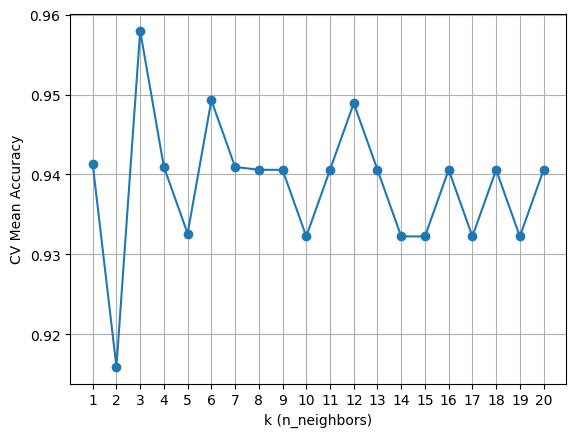

In [ ]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results['param_n_neighbors'] = cv_results['param_n_neighbors'].astype(int)

plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'],marker='o')

plt.grid(True)

plt.xlabel('k (n_neighbors)')

plt.ylabel('CV Mean Accuracy')

plt.xticks(range(1,21))

plt.show()

## OBSERVATIONS:

1.  The above graph shows the relation between n number of neighbors vs CV Mean accuracy score.

2.  At k=(1,2) the cv mean accuracy score is the least where it leads to overfitting(low bias and high variance)

3. But at K=3, its CV Accuracy score is the highest where its testing accuracy is the highest. So it is considered to be the generalized model.
As it is the generalized model, the k number is considered for the totl number of neighbors for training the KNN Model.

4. After k=15, the CV accuracy score decreases and it lease to the condition of underfitting.

## Step 12:  Predict the Iris Species

In [ ]:
## Step 12:  Predict the Iris Species

new_samples = np.array([[5.1, 3.5, 1.4, 0.2]])

pred = best_knn_model.predict(new_samples)


if(pred[0] == 0):
    print("setosa")
elif(pred[0] == 1):
    print("versicolor")
else:
    print("virginica")

virginica
